# A Math Problem and and experiment in Dynamic Graphic Solutions

This is a math problem I saw.  I could easily solve it with pen and paper, but I am using the oportunity to create a dynamic, animated solution.

Here is the problem:

Two men face each other at a distance of 60 meters. They begin to walk towards each other in a straight line. One walks at 3 meters per second, the other walks at 2 meters per second. How long will it take for them to meet each other?

<b>Solution:</b><br><br>
They meet after "t" seconds.<br><br>
The distance traveled by the first man in "t" seconds at a speed of 3 meters per second is: 
Distance_1 = 3 * t<br><br>
Similarly, the distance traveled by the second man in "t" seconds at a speed of 2 meters per second is: 
Distance_2 = 2 * t<br><br>
Since they are walking towards each other, the sum of the distances they travel will be equal to the initial distance between them, which is 60 meters:
Distance_1 + Distance_2 = 60<br><br>
Substituting the expressions for Distance_1 and Distance_2:
3t + 2t = 60<br><br>
Now, combine the like terms:
5t = 60<br><br>
To solve for "t," divide both sides by 5:
t = 60 / 5 = 12 seconds.<br><br>
So, it will take them 12 seconds to meet each other.


| Second | Man 1 (meters) | Man 2 (meters) | Remaining Distance |
|--------|----------------|----------------|--------------------|
| 0      | 0              | 0              | 60                 |
| 1      | 3              | 2              | 55                 |
| 2      | 6              | 4              | 50                 |
| 3      | 9              | 6              | 45                 |
| 4      | 12             | 8              | 40                 |
| 5      | 15             | 10             | 35                 |
| 6      | 18             | 12             | 30                 |
| 7      | 21             | 14             | 25                 |
| 8      | 24             | 16             | 20                 |
| 9      | 27             | 18             | 15                 |
| 10     | 30             | 20             | 10                 |
| 11     | 33             | 22             | 5                  |
| 12     | 36             | 24             | 0                  |


Now let's go to Python and solve the problem with an animation!

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
# Constants
man1_speed = 3  # meters per second
man2_speed = 2  # meters per second
initial_distance = 60  # meters

In [3]:
# Function to update the plot at each frame
def update(frame):
    # Calculate the distance traveled by each man
    distance_man1 = man1_speed * frame
    distance_man2 = man2_speed * frame

    # Calculate the remaining distance between the two men
    remaining_distance = initial_distance - (distance_man1 + distance_man2)

    # Clear the previous plot
    plt.clf()

    # Plot the movement of each man and the remaining distance
    plt.plot([0, distance_man1], [0.1, 0.1], 'b', lw=5, label='Man 1')
    plt.plot([initial_distance, initial_distance - distance_man2], [0.1, 0.1], 'g', lw=5, label='Man 2')
    plt.plot([distance_man1, initial_distance - distance_man2], [0.1, 0.1], 'r', lw=3, label='Remaining Distance')

    # Plot the images of walking men facing each other
    img_man1 = plt.imread('man1.png')
    img_man2 = plt.imread('man2.png')
    plt.imshow(img_man1, extent=[distance_man1 - 2, distance_man1 + 2, 0.1, 0.75], aspect='auto', alpha=0.9)
    plt.imshow(img_man2, extent=[initial_distance - distance_man2 - 2, initial_distance - distance_man2 + 2, 0.1, 0.75], aspect='auto', alpha=0.9)

    # Annotate the distance each man has walked and the remaining distance
    plt.annotate(f'Man 1: {distance_man1:.1f} m', xy=(distance_man1, 0.25), fontsize=10, color='blue')
    plt.annotate(f'Man 2: {distance_man2:.1f} m', xy=(initial_distance - distance_man2, 0.25), fontsize=10, color='green')
    plt.annotate(f'Remaining Distance: {remaining_distance:.1f} m', xy=(initial_distance / 2, 0.2), ha='center', fontsize=10, color='red')

    # Annotate the seconds elapsed
    plt.annotate(f'Seconds Elapsed: {frame}', xy=(initial_distance / 2, 0), ha='center', fontsize=12)

    # Set plot properties
    plt.xlim(-5, initial_distance + 5)
    plt.ylim(0, 1.5)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Distance (meters)')
    plt.title('Movement of Two Men Meeting Each Other')
    plt.grid(False)

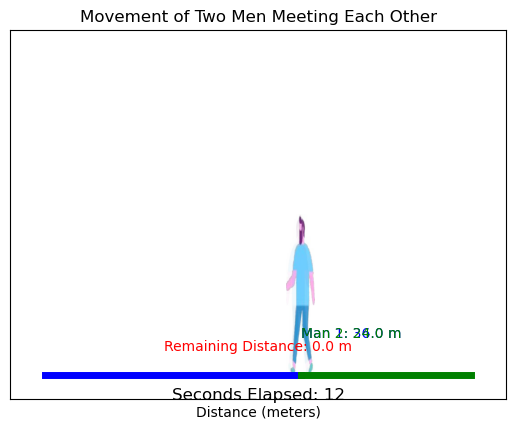

In [4]:
# Create the animation
animation = FuncAnimation(plt.gcf(), update, frames=range(0, 13), interval=1000)

# Save the animation as a GIF
writer = PillowWriter(fps=1, bitrate=1800)
animation.save('meeting_animation.gif', writer=writer)

# Show the animation (optional)
plt.show()
